The objective of this analysis was to evaluate whether any of the tested prompts demonstrated a statistically significant preference over the others. The dependent variable considered was the user’s prompt selection, which is characterized as a discrete categorical variable, since each participant explicitly chose one prompt among the available alternatives.

The analysis focused initially on the first-choice selection (content_option_1), as it represents the user’s primary preference. The observed frequencies showed that Prompt 1 was selected 153 times, whereas Prompts 2 and 3 were selected 65 and 36 times, respectively.

To assess whether this distribution differed significantly from a uniform distribution (i.e., no preference among prompts), a Chi-Square goodness-of-fit test was applied. The results indicated a chi-square statistic of χ² = 201.59 with a p-value of 1.91 × 10⁻⁴³, leading to rejection of the null hypothesis at the 5% significance level. This indicates that user choices were not random and that there was a statistically significant preference among the prompts.

Subsequently, pairwise comparisons between all prompts were conducted using the Chi-Square test of independence in order to identify which prompt demonstrated superior performance. The results showed that Prompt 1 exhibited statistically significant differences when compared to all other prompts (p < 0.05 in all pairwise comparisons).

Based on these findings, it can be concluded that Prompt 1 is statistically superior, as it was consistently selected more frequently than the other prompts, satisfying the adopted significance criterion.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare, chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    "survey_responses-export-2025-11-18_11-43-08.csv",
    sep=";"
)

df.head()

,id,session_id,organism_taxid,organism_name,selected_option,comparison_number,created_at,content_option_1,content_option_2
0,edaed81f-0de8-4bcb-ae9c-ac42f9b92bbc,7ba368a4-7057-4785-a221-cd3d700f7656,3052230,Hepacivirus hominis,2,4,2025-11-07 15:19:58.99356+00,1,4
1,5bc3c899-b9c1-4e7b-8fa0-f571a6c4c80d,7ba368a4-7057-4785-a221-cd3d700f7656,3052608,Pegivirus hominis,1,7,2025-11-07 15:20:00.030615+00,2,3
2,d8ac614f-cdb7-46d6-84ef-58b6880acb78,7ba368a4-7057-4785-a221-cd3d700f7656,2697049,Severe acute respiratory syndrome coronavirus 2,2,13,2025-11-07 15:20:01.052836+00,1,3
3,8c94778f-015a-4526-852e-f86af0236628,7ba368a4-7057-4785-a221-cd3d700f7656,3046277,Orthoflavivirus flavi,1,12,2025-11-07 15:20:02.647136+00,2,3
4,33402367-9059-4a7c-91f8-5f653022a073,7ba368a4-7057-4785-a221-cd3d700f7656,3046277,Orthoflavivirus flavi,2,11,2025-11-07 15:20:04.015248+00,1,3


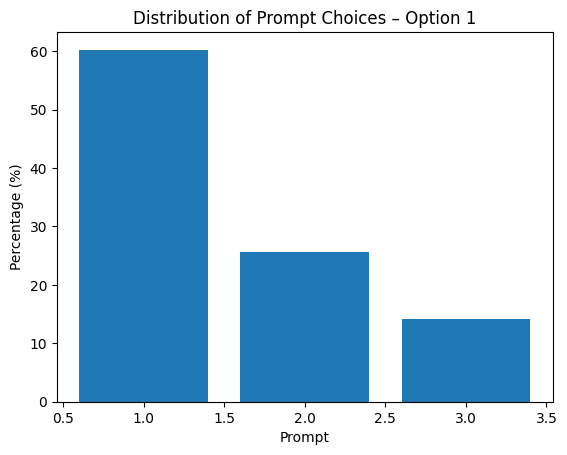

In [4]:
counts_1 = df["content_option_1"].value_counts().sort_index()
percent_1 = counts_1 / counts_1.sum() * 100

plt.figure()
plt.bar(percent_1.index, percent_1.values)
plt.xlabel("Prompt")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Prompt Choices – Option 1")
plt.show()

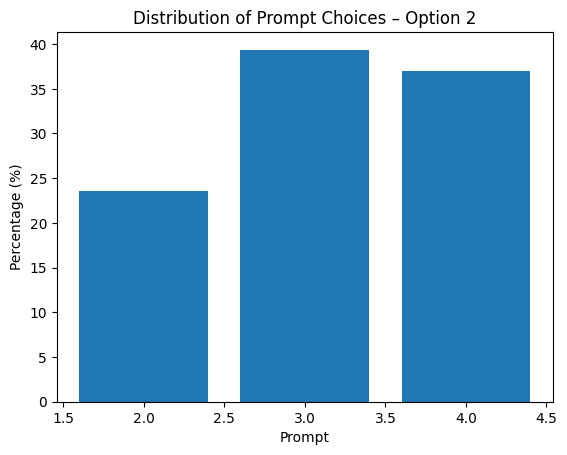

In [5]:
counts_2 = df["content_option_2"].value_counts().sort_index()
percent_2 = counts_2 / counts_2.sum() * 100

plt.figure()
plt.bar(percent_2.index, percent_2.values)
plt.xlabel("Prompt")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Prompt Choices – Option 2")
plt.show()

In [7]:
score_option_1 = df["content_option_1"].value_counts() * 3
score_option_2 = df["content_option_2"].value_counts() * 1

In [8]:
all_prompts = [1, 2, 3, 4]

total_score = (
    score_option_1
    .add(score_option_2, fill_value=0)
    .reindex(all_prompts, fill_value=0)
)

total_score

1    459.0
2    255.0
3    208.0
4     94.0
Name: count, dtype: float64

In [10]:
all_prompts = [1, 2, 3, 4]

total_score = (
    score_option_1
    .add(score_option_2, fill_value=0)
    .reindex(all_prompts, fill_value=0)
)

total_score

1    459.0
2    255.0
3    208.0
4     94.0
Name: count, dtype: float64

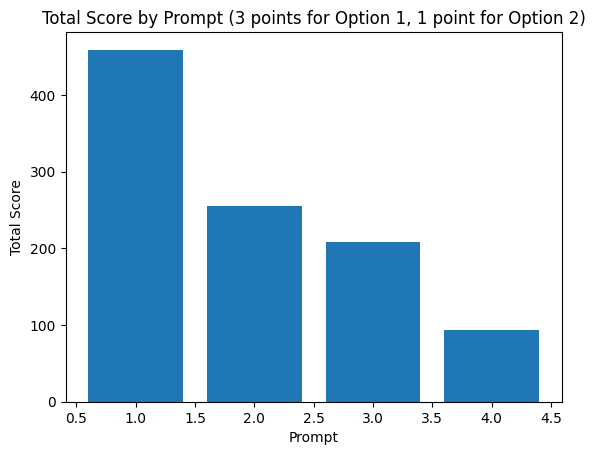

In [11]:
plt.figure()
plt.bar(total_score.index, total_score.values)
plt.xlabel("Prompt")
plt.ylabel("Total Score")
plt.title("Total Score by Prompt (3 points for Option 1, 1 point for Option 2)")
plt.show()

In [3]:
df["content_option_1"] = df["content_option_1"].astype(int)
df["content_option_2"] = df["content_option_2"].astype(int)

In [11]:
freq_option1 = (
    df["content_option_1"]
    .value_counts()
    .sort_index()
)

freq_option2 = (
    df["content_option_2"]
    .value_counts()
    .sort_index()
)

print(freq_option1, freq_option2)


content_option_1
1    153
2     65
3     36
Name: count, dtype: int64 content_option_2
2     60
3    100
4     94
Name: count, dtype: int64


In [5]:
all_prompts = [1, 2, 3, 4]

freq_option1 = freq_option1.reindex(all_prompts, fill_value=0)

In [6]:
chi2_stat, p_value = chisquare(freq_option1)

chi2_stat, p_value

(np.float64(201.59055118110237), np.float64(1.9119727171551234e-43))

In [7]:
most_chosen_prompt = freq_option1.idxmax()
most_chosen_prompt

np.int64(1)

In [8]:
pairwise_results = []

for a, b in combinations(all_prompts, 2):
    table = pd.DataFrame({
        "chosen": [
            (df["content_option_1"] == a).sum(),
            (df["content_option_1"] == b).sum()
        ],
        "not_chosen": [
            (df["content_option_1"] != a).sum(),
            (df["content_option_1"] != b).sum()
        ]
    }, index=[a, b])

    chi2, p, _, _ = chi2_contingency(table)

    pairwise_results.append({
        "prompt_1": a,
        "prompt_2": b,
        "p_value": p
    })

pairwise_df = pd.DataFrame(pairwise_results)
pairwise_df

,prompt_1,prompt_2,p_value
0,1,2,6.253349e-15
1,1,3,1.783598e-26
2,1,4,6.451718e-49
3,2,3,1.854081e-03
4,2,4,1.884953e-17
5,3,4,1.433220e-09


In [10]:
significant_pairs = pairwise_df[pairwise_df["p_value"] < 0.05]

significant_pairs

,prompt_1,prompt_2,p_value
0,1,2,6.253349e-15
1,1,3,1.783598e-26
2,1,4,6.451718e-49
3,2,3,1.854081e-03
4,2,4,1.884953e-17
5,3,4,1.433220e-09
